In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warnings

In [6]:
df=pd.read_csv("Car details updated.csv")

In [7]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y


In [8]:
df.shape

(7906, 18)

In [13]:
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

####  As in given data the shape of data is is having 7906 rows and 18 coloumns with no null values so here no need to apply imputation technique

# What factor affect the most on selling price?


In [14]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [16]:
df['sold'].unique()

array(['Y', 'N'], dtype=object)

In [74]:
fact=df[df['sold']=='Y'][['year','selling_price','km_driven','fuel','transmission','engine','name']]

In [75]:
display(fact.head(10).sort_values(by='year',ascending=False).style.background_gradient(cmap='CMRmap_r'))

,year,selling_price,km_driven,fuel,transmission,engine,name
5,2017,440000,45000,Petrol,Manual,1197 CC,Hyundai Xcent 1.2 VTVT E Plus
0,2014,450000,145500,Diesel,Manual,1248 CC,Maruti Swift Dzire VDI
1,2014,370000,120000,Diesel,Manual,1498 CC,Skoda Rapid 1.5 TDI Ambition
9,2013,200000,169000,Diesel,Manual,1399 CC,Ford Figo Diesel Celebration Edition
8,2011,350000,90000,Diesel,Manual,1364 CC,Toyota Etios VXD
3,2010,225000,127000,Diesel,Manual,1396 CC,Hyundai i20 Sportz Diesel
4,2007,130000,120000,Petrol,Manual,1298 CC,Maruti Swift VXI BSIII
6,2007,96000,175000,LPG,Manual,1061 CC,Maruti Wagon R LXI DUO BSIII
2,2006,158000,140000,Petrol,Manual,1497 CC,Honda City 2017-2020 EXi
7,2001,45000,5000,Petrol,Manual,796 CC,Maruti 800 DX BSII


In [72]:
fact=df[df['sold']=='N'][['year','selling_price','km_driven','fuel','transmission','engine']]
display(fact.head(10).sort_values(by='year',ascending=False).style.background_gradient(cmap='CMRmap_r'))

,year,selling_price,km_driven,fuel,transmission,engine
2002,2016,351000,60000,Petrol,Manual,998 CC
2009,2016,351000,60000,Petrol,Manual,998 CC
2000,2014,450000,56000,Diesel,Manual,1396 CC
2006,2014,411000,90000,Diesel,Automatic,1498 CC
2007,2014,450000,56000,Diesel,Manual,1396 CC
2004,2013,1300000,140000,Diesel,Automatic,1995 CC
2005,2013,260000,189000,Diesel,Manual,1248 CC
2001,2012,1300000,140000,Diesel,Automatic,1995 CC
2003,2012,550000,130000,Diesel,Manual,2179 CC
2008,2012,1300000,140000,Diesel,Automatic,1995 CC


### from the above display  we can infer that when the car is been sold or not then these factor affects the more 
- engine 
- year 
- km_driven

# Which country has eco friendly cars and which brand manufactures it?

In [48]:
eco=df[df['fuel']=='CNG'][['State or Province','name']]

In [49]:
eco.head()

,State or Province,name
33,Washington,Maruti Alto 800 CNG LXI Optional
196,Illinois,Maruti Wagon R LXI CNG
388,Michigan,Maruti Eeco CNG 5 Seater AC
838,Georgia,Maruti Alto 800 CNG LXI
1187,Wisconsin,Maruti Eeco CNG 5 Seater AC BSIV


In [50]:
eco['Brand']=df['name'].apply(lambda x:x.split()[0])

In [59]:
final_eco= eco.drop(df[['name']],axis=1)

In [64]:
final_eco.head()

,State or Province,Brand
33,Washington,Maruti
196,Illinois,Maruti
388,Michigan,Maruti
838,Georgia,Maruti
1187,Wisconsin,Maruti


In [70]:
final_eco.groupby(['State or Province','Brand'])['Brand'].agg('count').sort_values(ascending=False)

State or Province  Brand  
California         Maruti     5
Illinois           Maruti     5
Michigan           Maruti     4
Tennessee          Maruti     3
New York           Maruti     3
Illinois           Hyundai    2
Kansas             Maruti     2
South Carolina     Maruti     2
Pennsylvania       Maruti     2
Oklahoma           Maruti     2
Florida            Maruti     2
Indiana            Maruti     1
Wisconsin          Maruti     1
Georgia            Maruti     1
Massachusetts      Maruti     1
Connecticut        Tata       1
Colorado           Maruti     1
Florida            Hyundai    1
Mississippi        Maruti     1
Michigan           Hyundai    1
Minnesota          Maruti     1
Washington         Maruti     1
New Hampshire      Maruti     1
New Jersey         Maruti     1
New Mexico         Maruti     1
North Carolina     Maruti     1
Ohio               Maruti     1
Oregon             Maruti     1
Texas              Maruti     1
Utah               Maruti     1
Alabama      

### Fom the above analysis we infer that california is the State or Province who uses more CNG cars and the Brand which manufactures the most CNG cars is Maruti 

# Which seller type has more sales?

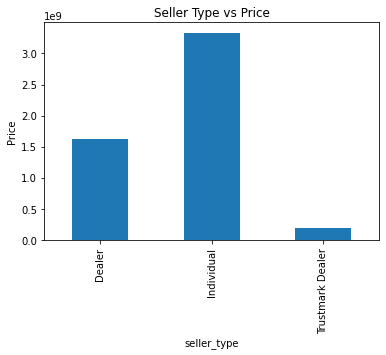

In [77]:
x = df.groupby('seller_type').selling_price.sum()
fig = plt.figure()
axiss1 = fig.add_subplot(1,1,1)
axiss1.set_xlabel('Seller Type')
axiss1.set_ylabel('Price')
axiss1.set_title('Seller Type vs Price')
x.plot(kind='bar');

In [78]:
x

seller_type
Dealer              1616119957
Individual          3332073320
Trustmark Dealer     189234000
Name: selling_price, dtype: int64

### We have infered from the above plot individual sales have more sales

# What are the to 10 cars?

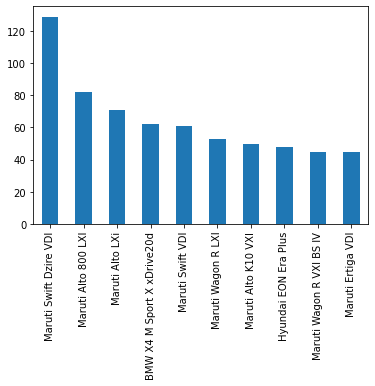

In [80]:
df.name.value_counts().head(10).plot.bar()

### Above plot shows the top 10 cars in which maruti swift dzire VDI is 1st